# Census Income Project

Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Importing the required libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Loading the dataset
data=pd.read_csv('Census-Income.csv')
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
# Dataframe for dataset
ds=pd.DataFrame(data=data)

# EDA

In [6]:
# Gettign information about data set
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Key Observation: 1) We have 32560 rows and 15 columns in the dataset. 2) There are 9 object type variables and 6 numeric.

In [7]:
# checking null values
ds.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no Null Values 

<AxesSubplot:>

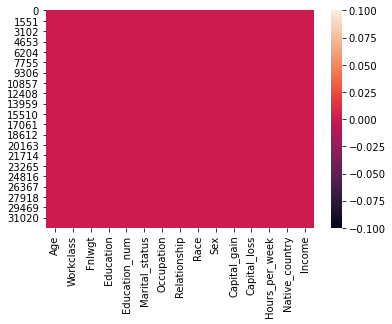

In [8]:
sns.heatmap(ds.isnull())

The heat map also shows there are no null values in the data set

In [9]:
#Summary Statistics
ds.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Key Observaation: 1) for capital_gain and Capital_loss the data lies in range of 75% and max values. Having high standarx deviation.
    2)There is large diffence between Max ans 75% for Hours_per_week varibale. it means there are outliers present.
    3)capital.gain - majority of the values are 0, and same for the capital.loss.
    So we can drop the both the column.

<AxesSubplot:>

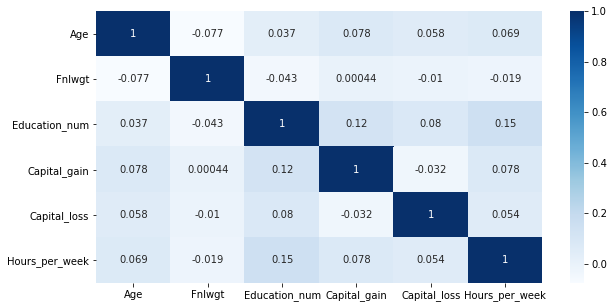

In [12]:
# Correlation Matrix ---Pearson Method
fig =plt.figure(figsize=(10,5))
hc=ds.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap='Blues')

There is no evidence of strrong relationship or correlation of the above mentions varriables.

In [13]:
ds['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

90% of the values belongs to only one country USA.

In [14]:
# droping the column from dataset 
# Variables capital.gain, Capital_loss, and fnlwgt,not contributing, we can drop these three columns.
#native.country - almost 90% observations are from one country. Seems useless. 
ds.drop(['Fnlwgt','Native_country','Capital_gain','Capital_loss'],axis=1,inplace=True)

<AxesSubplot:xlabel='count', ylabel='Workclass'>

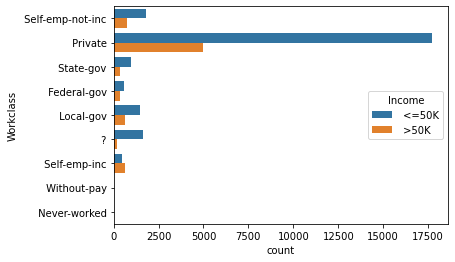

In [15]:
sns.countplot(y=ds['Workclass'], hue=ds['Income'])

Key Observation:most of the people having salary less than 50k is from the private sector.

<AxesSubplot:xlabel='count', ylabel='Sex'>

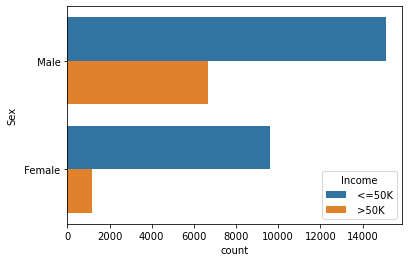

In [16]:
sns.countplot(y=ds['Sex'], hue=ds['Income'])

Key Observation:most of the people working are having salary less than 50k

<AxesSubplot:xlabel='count', ylabel='Marital_status'>

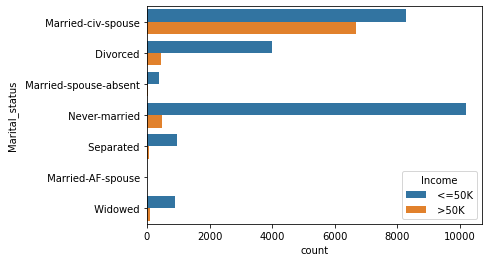

In [20]:
sns.countplot(y=ds['Marital_status'], hue=ds['Income'])

In [ ]:
Key Observation:Never married,Separated,Widowed and Dovorced working are having salary less than 50k

<AxesSubplot:xlabel='Education', ylabel='count'>

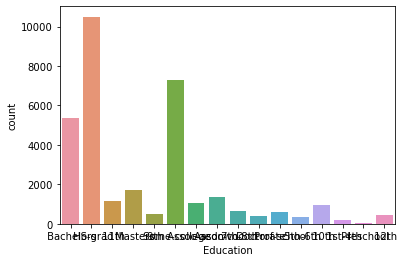

In [79]:

sns.countplot(x='Education',data=ds)

Key Observation:Most of the people have Bachelor and Master degeree 

<AxesSubplot:xlabel='Occupation', ylabel='count'>

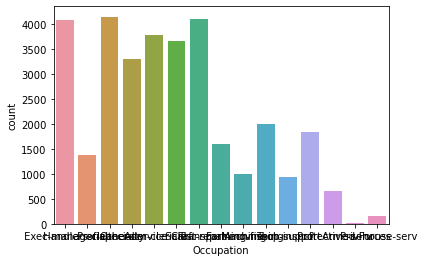

In [80]:
sns.countplot(x='Occupation',data=ds)

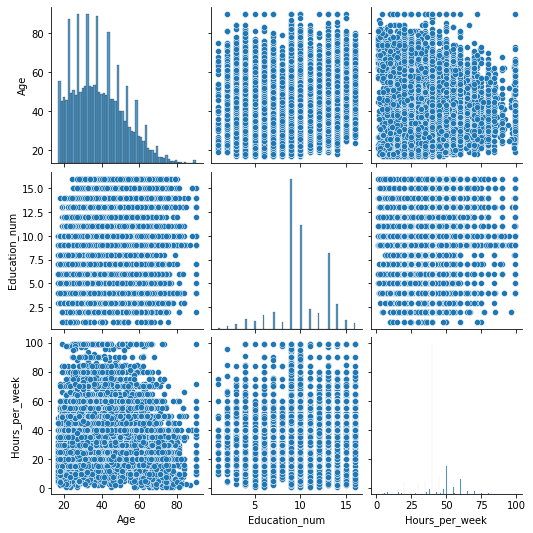

In [23]:
sns.pairplot(ds)

It seems there is no strong relationship in the above variables.

<AxesSubplot:xlabel='Income', ylabel='count'>

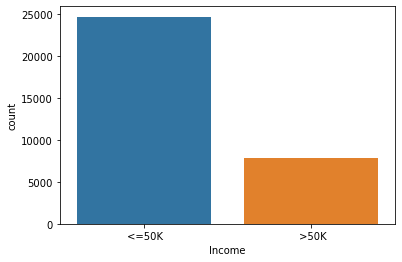

In [25]:
sns.countplot(x='Income',data=ds)

There is class Imbalance in the target varibale

# Finding the outliers and Skewness

Age                  AxesSubplot(0.125,0.125;0.168478x0.755)
Education_num     AxesSubplot(0.327174,0.125;0.168478x0.755)
Hours_per_week    AxesSubplot(0.529348,0.125;0.168478x0.755)
dtype: object

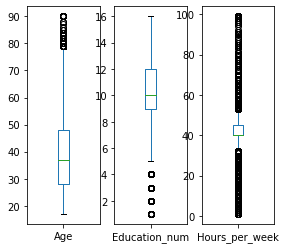

In [28]:
# Box plot for all coulmns
ds.plot(kind='box',subplots=True,layout=(1,4))

We can see above thewre are outliers present in the above three columns. Lets check separetly.

<AxesSubplot:>

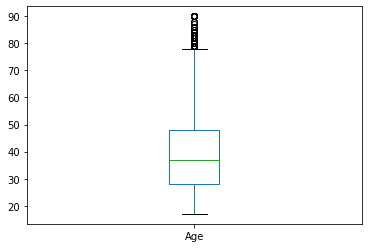

In [29]:
ds['Age'].plot.box()

<AxesSubplot:>

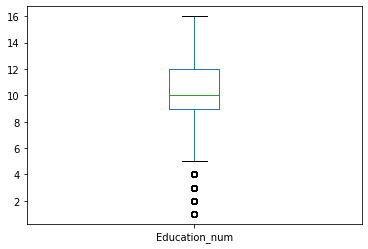

In [30]:
ds['Education_num'].plot.box()

<AxesSubplot:>

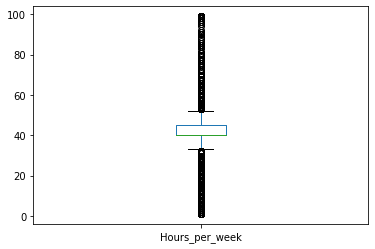

In [31]:

ds['Hours_per_week'].plot.box()

In [32]:
ds.skew()

Age               0.558738
Education_num    -0.311630
Hours_per_week    0.227636
dtype: float64

Since we are accepting skewness +0.5/-0.5

In [37]:
# Defining data frame having int type variables having outliers, excluding obj type variables
m=ds[['Age','Education_num']]

In [38]:
#Handling the Outliers.Removing the outliers.
from scipy.stats import zscore
z=np.abs(zscore(m))
z
threshold=3
print(np.where(z>3))

(array([  159,   220,   221,   223,   415,   429,   462,   485,   535,
         917,   928,   931,  1039,  1138,  1167,  1290,  1633,  1912,
        1934,  2302,  2580,  2583,  2670,  2753,  2816,  2860,  2883,
        2890,  2905,  2945,  3210,  3231,  3445,  3536,  3591,  3776,
        3940,  3962,  4069,  4106,  4108,  4302,  4325,  4523,  4717,
        4833,  5064,  5089,  5103,  5271,  5290,  5369,  5405,  5509,
        5664,  5733,  5740,  5833,  5841,  5876,  5957,  6213,  6231,
        6432,  6438,  6623,  6747,  6863,  7069,  7172,  7299,  7318,
        7480,  7719,  7729,  7738,  7849,  7871,  7893,  8079,  8087,
        8095,  8210,  8309,  8380,  8430,  8497,  8693,  8752,  8774,
        8805,  8885,  8886,  8962,  8972,  8999,  9017,  9470,  9657,
        9756,  9838,  9997, 10123, 10209, 10263, 10309, 10344, 10544,
       10558, 10713, 10970, 11133, 11237, 11293, 11296, 11359, 11511,
       11730, 11733, 11836, 11873, 11981, 11995, 12117, 12423, 12450,
       12491, 12618

In [39]:
# lets check the presence of outlier
print('shape before remooving the outliers:',ds.shape)
dsnew=ds[(z<3).all(axis=1)]

print('shape after remooving the outliers:',dsnew.shape)
# here 236 rows will be droped

shape before remooving the outliers: (32560, 11)
shape after remooving the outliers: (32224, 11)


In [40]:
# Converting values in target column to numbers

ds['Income'] = ds['Income'].map({'<=50K':0, '>50K':1})

In [41]:
#Encoding the categorical varibales
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in dsnew.columns:
    if dsnew[i].dtypes=='object':
        dsnew[i]=oe.fit_transform(dsnew[i].values.reshape(-1,1))
dsnew

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Income
0,50,6.0,8.0,13,2.0,4.0,0.0,4.0,1.0,13,0.0
1,38,4.0,10.0,9,0.0,6.0,1.0,4.0,1.0,40,0.0
2,53,4.0,1.0,7,2.0,6.0,0.0,2.0,1.0,40,0.0
3,28,4.0,8.0,13,2.0,10.0,5.0,2.0,0.0,40,0.0
4,37,4.0,11.0,14,2.0,4.0,5.0,4.0,0.0,40,0.0
...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,6.0,12,2.0,13.0,5.0,4.0,0.0,38,0.0
32556,40,4.0,10.0,9,2.0,7.0,0.0,4.0,1.0,40,1.0
32557,58,4.0,10.0,9,6.0,1.0,4.0,4.0,0.0,40,0.0
32558,22,4.0,10.0,9,4.0,1.0,3.0,4.0,1.0,20,0.0


In [42]:
dsnew.shape

(32224, 11)

In [43]:
x=dsnew.drop(columns=['Income'])
y=dsnew['Income']

In [44]:
x.shape

(32224, 10)

In [45]:
y.shape

(32224,)

In [46]:
# Handiling class imbalance using SMOTE
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_over,y_over = sm.fit_resample(x,y)

In [47]:
x_over.shape

(48810, 10)

In [48]:
y_over.shape

(48810,)

In [49]:
y_over.value_counts()

1.0    24405
0.0    24405
Name: Income, dtype: int64

In [50]:
# lets bring all feature into common scale
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
x_over=scale.fit_transform(x_over)
x_over

array([[ 0.77107838,  1.51338003, -0.43023639, ...,  0.36145555,
         0.60669101, -2.42116633],
       [-0.17753154,  0.06420863,  0.21936666, ...,  0.36145555,
         0.60669101, -0.17978407],
       [ 1.00823086,  0.06420863, -2.70384705, ..., -2.23627025,
         0.60669101, -0.17978407],
       ...,
       [ 0.5339259 ,  0.06420863,  0.54416818, ...,  0.36145555,
         0.60669101, -0.17978407],
       [-0.41468402,  0.15123473,  0.33639717, ...,  0.36145555,
         0.60669101,  1.81255571],
       [ 1.00823086,  0.06420863, -0.43023639, ...,  0.36145555,
        -0.28921195, -0.17978407]])

In [51]:
# To find the best random state using logistic Regressor model
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.30,random_state=i)
    mod= LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print ('best accuracy is',maxAccu,'on random state',maxRS)

best accuracy is 0.7553097042955679 on random state 24


In [52]:
# Sending the data for train and test using Train_test_Split 
# 30 % data will go for testing and 70% data will go for training the model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(22556, 10)
(9668, 10)
(22556,)
(9668,)


70% of the data (22556 rows) will be available for training the model & 30% (9668 rows) will be available for testing the model

# Model Building & Evaluation

Since the target variable are categorical values. we can build the classification models. Therefore,evalution criteria will be: Evaluation Matrics : accuracy_score,confusion_matrix,classifcation_report,Auc ROC curve

In [53]:
# Logistic regression Model
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score:',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.8014067025237899
[[6827  472]
 [1448  921]]
              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88      7299
         1.0       0.66      0.39      0.49      2369

    accuracy                           0.80      9668
   macro avg       0.74      0.66      0.68      9668
weighted avg       0.78      0.80      0.78      9668



In [54]:
# Gauusian Naive_bayes classifcation Model
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.7753413322300372
[[5811 1488]
 [ 684 1685]]
              precision    recall  f1-score   support

         0.0       0.89      0.80      0.84      7299
         1.0       0.53      0.71      0.61      2369

    accuracy                           0.78      9668
   macro avg       0.71      0.75      0.73      9668
weighted avg       0.81      0.78      0.79      9668



In [55]:
# Decision Tree Classifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7839263549855192
[[6312  987]
 [1102 1267]]
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86      7299
         1.0       0.56      0.53      0.55      2369

    accuracy                           0.78      9668
   macro avg       0.71      0.70      0.70      9668
weighted avg       0.78      0.78      0.78      9668



In [56]:
# Support Vector classifcation Model
sv=SVC(kernel='rbf')
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
predsv=sv.predict(x_test)
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

0.8037856847331403
[[6948  351]
 [1546  823]]
              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88      7299
         1.0       0.70      0.35      0.46      2369

    accuracy                           0.80      9668
   macro avg       0.76      0.65      0.67      9668
weighted avg       0.79      0.80      0.78      9668



In [57]:
# KNeighbors classifcation Model
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.7973727761688043
[[6427  872]
 [1087 1282]]
              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87      7299
         1.0       0.60      0.54      0.57      2369

    accuracy                           0.80      9668
   macro avg       0.73      0.71      0.72      9668
weighted avg       0.79      0.80      0.79      9668



In [58]:
# RandomForest classifcation Model
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=50,random_state=0)
#randomforsetclassifier(100)----Default
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
rf.score(x_train,y_train)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.813818783616053
[[6580  719]
 [1081 1288]]
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      7299
         1.0       0.64      0.54      0.59      2369

    accuracy                           0.81      9668
   macro avg       0.75      0.72      0.73      9668
weighted avg       0.81      0.81      0.81      9668



Based on the results of above models, and capomaring the Accuracy score and other evalution matrics result of recall, precision. Accuracy_Score 1 LogisticRegression 0.80 2.Gaussian Naive_bayes 0.78 3 DecisionTreeClassifier 0.78 4 Random Forest Classifier 0.81 5  6.rbf SVC 0.80

Random Forest & SVC-rbf have the best accuracy score and the best F1 and Recall values among the 6 alogorithims used above.To find the best Model for prediction in our case.Lets do cross validation.

# Cross Validation

In [59]:
lgscores =cross_val_score(lg,x,y,cv=5)
print(lgscores)
print(lgscores.mean(),lgscores.std())

[0.80201707 0.80387898 0.806827   0.80558573 0.80260708]
0.8041831685671482 0.0018014211946693803


In [60]:
gnbscores =cross_val_score(gnb,x,y,cv=5)
print(gnbscores)
print(gnbscores.mean(),gnbscores.std())

[0.77455392 0.77595035 0.77300233 0.7734678  0.77979516]
0.7753539114091013 0.0024416284844408415


In [61]:
dtcscores=cross_val_score(dtc,x,y,cv=5)
print(dtcscores)
print(dtcscores.mean(),dtcscores.std())

[0.78153607 0.7768813  0.78246703 0.78060512 0.77700186]
0.7796982777924654 0.0023268796124217214


In [63]:
knnscores =cross_val_score(knn,x,y,cv=5)
print(knnscores)
print(knnscores.mean(),knnscores.std())

[0.80015516 0.8094647  0.80651668 0.80434445 0.80477964]
0.8050521265986028 0.0030387850607147882


In [64]:
rfscores =cross_val_score(rf,x,y,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.813654   0.81225756 0.81427463 0.82404965 0.81657356]
0.8161618797069604 0.004182852691375648


It can be observed that the "RandomForest Classifier" algorithim has the almost same accuracy score before and after the cross validation. So the best model with highet accuracy score and best on evalution with other matrix is "Random Forest" is the best model for predicting the Income prediction..

# AUC ROC Curve

In [65]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

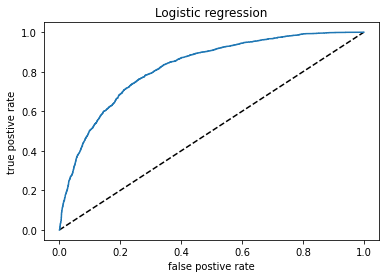

0.6620526204720736

In [66]:
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('false postive rate')
plt.ylabel('true postive rate')
plt.title('Logistic regression')
plt.show()
auc_score=roc_auc_score(y_test,lg.predict(x_test))
auc_score

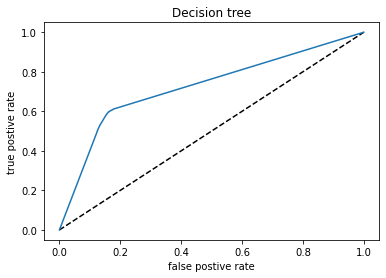

0.6998004086556436

In [67]:
y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision tree classifier')
plt.xlabel('false postive rate')
plt.ylabel('true postive rate')
plt.title('Decision tree')
plt.show()
auc_score=roc_auc_score(y_test,dtc.predict(x_test))
auc_score

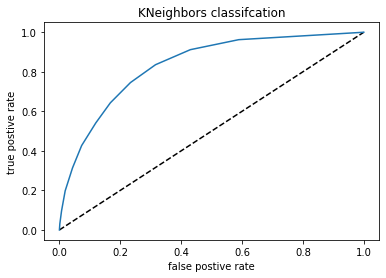

0.7108440929156928

In [68]:
y_pred_prob=knn.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighbors classifcation Model')
plt.xlabel('false postive rate')
plt.ylabel('true postive rate')
plt.title('KNeighbors classifcation')
plt.show()
auc_score=roc_auc_score(y_test,knn.predict(x_test))
auc_score

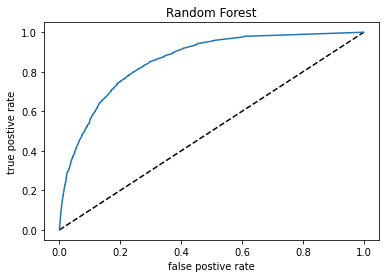

0.722591337821247

In [69]:
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest classifier')
plt.xlabel('false postive rate')
plt.ylabel('true postive rate')
plt.title('Random Forest')
plt.show()
auc_score=roc_auc_score(y_test,rf.predict(x_test))
auc_score

Key Observations: Random Forest Classifier model has highest area under the curve. And AUC ROC score is 72%.It means our model has 72% efficacy.

# HyperParameter tuning

In [70]:
from sklearn.model_selection import GridSearchCV 
parameter={'max_depth':np.arange(5,10),'criterion':['gini','entropy']}

In [71]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [72]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([5, 6, 7, 8, 9])})

In [74]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [75]:
rf_final= RandomForestClassifier(max_depth=9,criterion='entropy',random_state=0)
#randomforsetclassifier(100)----Default
rf_final.fit(x_train,y_train)
predrf_final=rf_final.predict(x_test)
rf_final.score(x_train,y_train)
print(accuracy_score(y_test,predrf_final))
print(confusion_matrix(y_test,predrf_final))
print(classification_report(y_test,predrf_final))

0.8354364915184113
[[6855  444]
 [1147 1222]]
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      7299
         1.0       0.73      0.52      0.61      2369

    accuracy                           0.84      9668
   macro avg       0.80      0.73      0.75      9668
weighted avg       0.83      0.84      0.82      9668



# Saving The Best Model

In [76]:
import joblib
joblib.dump(rf_final,'Model_Census-Income.obj')

['Model_Census-Income.obj']